### Muhammed Hassen
###  Minisit Handwritten Digit recogntion

## 1. Import libarary 

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


## 2. Load data 

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

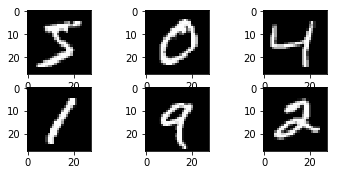

In [29]:
# plot first few images
for i in range(6):
	# define subplot
	plt.subplot(330 + 1+ i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

## 3. Preprae data 

In [31]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Modeling Building

In [18]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
#model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1600)              0         
__________

In [21]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 94s 2ms/step - loss: 0.1308 - acc: 0.9602 - val_loss: 0.0623 - val_acc: 0.9835
Epoch 2/5
54000/54000 [==============================] - 99s 2ms/step - loss: 0.0951 - acc: 0.9707 - val_loss: 0.0515 - val_acc: 0.9865
Epoch 3/5
54000/54000 [==============================] - 98s 2ms/step - loss: 0.0801 - acc: 0.9749 - val_loss: 0.0423 - val_acc: 0.9875
Epoch 4/5
54000/54000 [==============================] - 122s 2ms/step - loss: 0.0702 - acc: 0.9781 - val_loss: 0.0402 - val_acc: 0.9888
Epoch 5/5
54000/54000 [==============================] - 126s 2ms/step - loss: 0.0637 - acc: 0.9796 - val_loss: 0.0373 - val_acc: 0.9903


## 5. Modeling Testing

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.03199500903703738
Test accuracy: 0.989
